<a href="https://colab.research.google.com/github/FerrazThales/Deep-Learning/blob/main/Cat_and_NonCat_with_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>Encontre eu e meus projetos nas redes sociais!</b></h1>
<table>
  <tr>
  <td><a href="https://thalesferraz.medium.com/">
  <img src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true" width="800" title="Olá, Meu nome é Thales e sou cientista de Dados!"/>
  </a>
  </td>
  <td><a href="https://github.com/FerrazThales">
  <img hspace=30 vspace=110 src="https://image.flaticon.com/icons/png/512/1051/1051326.png" width="60%" title="Entre em meu Github e veja mais projetos!" /> 
  </a>
  </td>
  <td>
  <a href="https://www.youtube.com/watch?v=3N-6OZBrDoI">
  <img vspace=110 src="https://download.logo.wine/logo/Medium_(website)/Medium_(website)-Logo.wine.png" width="800" title="Veja este meu projeto no Medium!"/>
  </a>
  </td>
  <td><a href="https://www.linkedin.com/in/thalesdefreitasferraz/"><img vspace=150 src="https://image.flaticon.com/icons/png/512/889/889122.png" width="40%" title="Vamos trocar uma idéia sobre Data Science no LinkedIn?" />
  </a>
  </td>
  </tr>
</table>


# O que você vai aprender neste projeto: 

* O que são redes **neurais** artificiais e como construir uma **simples**.
* Como **dados** de imagens são **armazenados** e podem ser **processados** atráves da vetorização.
* Um **classificador** de imagens de **gatos** que utiliza *Deep Learning*.


# Introdução a Redes Neurais Artificiais 🧠

> Todo fazer é um conhecer e todo conhecer é um fazer.  *(Maturana e Varela, A árvore do conhecimento).*

A arquitetura do **sistema** nervoso vem sendo estudada há muito tempo. Os avanços da **neurociência** permitiram entender, de forma resumida, como as atividades ocorrem nas células cerebrais.

Na imagem abaixo observamos que os **impulsos** nervosos são passados de um neurônio ao outro **através** de seus axônios (*saída*) e dendritos (*chegada*). A efetividade desta **sinapse** (*ponto de contato estreito entre os neurônios*) está **subordinada** ao estado de excitação/atividade de **cada** impulso. Caso não existam condições **favoráveis** ao impulso, a **comunicação** entre os neurônios não prossegue.

<center><img src="https://cdn.kastatic.org/ka-perseus-images/b404bfc9d6246ff3475f6fd2b34fbb7374fc4873.png" width="80%"></center>


Foi no paper [A logical calculus of the ideias immanent in nervous activity](https://jontalle.web.engr.illinois.edu/uploads/498-NS.19/McCulloch-Pitts-1943-neural-networks.pdf) publicado em **1943** que *McCulloch e Pitts*, inspirados pelo funcionamento dos **neurônios** reais, propuseram um modelo **matemático** que simulava os comportamentos *all-or-none* das **atividades** neurofisiológicas. Ou seja, este **tudo-ou-nada** representava se o sinal iria **prosseguir** ao próximo neurônio ou não - e isto estava condicionado a uma proposição **lógica**. 

A imagem abaixo ilustra este simples **modelo** matemático. As **entradas** (*x1,x2,x3...*) ingressam no neurônio, se combinam **linearmente** e ficam dependentes de uma função de **ativação**. Caso esta função retorne um valor **favorável** `(1)`, o impulso prosegue.

<center><img src="https://miro.medium.com/max/738/1*fDHlg9iNo0LLK4czQqqO9A.png"></center>

Portanto, uma rede neural **artificial** simples é isso. Uma **combinação** de diferentes **entradas**, também chamadas de variáveis *independentes*, que são inputadas em uma função de ativação para nos trazer a estimativa da **probabilidade** de uma **classe** ocorrer. 

Ao longo deste projeto, será apresentada às **fórmulas matemáticas** que podem ser utilizadas para representar esta combinação linear e qual seria uma boa função de ativação, também haverá algumas **derivadas** para nos ajudar nestes processos🤓 . Além disso, será apresentada a ideia de **Forward Propagation** e **Backward Propagation**.

A forma resumida da **construção** da estrutura de uma simples rede neural foi brilhantemente **resumida** por [Tess Ferrandez](https://www.datasciencecentral.com/profiles/blogs/logistic-regression-as-a-neural-network).

<center><img src="https://storage.ning.com/topology/rest/1.0/file/get/2408482975?profile=RESIZE_710x" width="75%"></center>

O objetivo deste projeto é utilizar esta estrutura de uma rede neural simples para **classificar** imagens. Portanto, a partir de diferentes figuras de **gatos** nosso algoritmo irá rotular o plot como **sendo** ou não de um gato.  

In [1]:
#ignorar os warnings
import warnings
warnings.filterwarnings('ignore')

#importando as bibliotecas que serão utilizadas
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

#Obtenção dos dados

Estas bases de dados foram obtidas no [Kaggle](https://www.kaggle.com/muhammeddalkran/catvnoncat). De acordo com o autor, elas foram **disponibilizadas** como desafio de uma de suas aulas de **Introdução a Visão Computacional** na *Bilkent University*. As bases de dados vieram no formato `h5` e os dados já estavam **separados** em treino e teste.

Em resumo, estes registros trazem informações de **imagens** (64x64 pixels) que contém - ou não contém, gatos. Desta forma, as imagens que contém **gatos** estão rotuladas com o valor 1 e as que não contém estão **rotuladas** com o valor **zero**.

Caso os **links** dos datasets não estejam funcionando, você pode buscá-los em meu [Github](https://github.com/FerrazThales/Deep-Learning/tree/main/catvnoncat).


In [3]:
#guardando os endereços dos dados de treino e teste
train_data_path = "/content/train_catvnoncat.h5"
test_data_path = "/content/test_catvnoncat.h5"

#importando os dados de treino e teste
train_data = h5py.File(train_data_path,'r')
test_data = h5py.File(test_data_path,'r')

#armazenando as variáveis do treino
x_train = train_data['train_set_x']
y_train = train_data['train_set_y']

#armazenando as variáveis de teste
x_test = test_data['test_set_x']
y_test = test_data['test_set_y']

#Análise Exploratória dos Dados

Ok, importamos um **dataset** no formato [h5](https://pt.wikipedia.org/wiki/Hierarchical_Data_Format). Agora precisamos **explorar** um pouco mais o `shape` destes dados - uma vez que **imagens** quase sempre vem no formato [matricial](https://brasilescola.uol.com.br/matematica/matriz.htm). Além disso, realizar alguns **plots** para ver se de fato existem estes **gatos** e não pegamos o dataset errado 😆.

In [4]:
#visualizando o tipo de dado
type(x_train)

h5py._hl.dataset.Dataset

In [5]:
#avaliando a quantidade de valores para treino
print('Variavéis independentes de treino:', x_train.shape)
print('Variavéis dependentes de treino:', y_train.shape)

Variavéis independentes de treino: (209, 64, 64, 3)
Variavéis dependentes de treino: (209,)


In [6]:
#avaliando a quantidade de valores para teste
print('Variavéis independentes de teste:', x_test.shape)
print('Variavéis dependentes de teste:', y_test.shape)

Variavéis independentes de teste: (50, 64, 64, 3)
Variavéis dependentes de teste: (50,)


Como esperado, os **dados** estão em formas **matriciais** bem interessantes. Existem *209* registros para **treino** e *50* para **teste**. 

Os valores de `x` representam a forma **matricial** de representação das **imagens**. Já os valores de `y` são as **classificações** destas imagens. Mais adiante tornaremos estes **rótulos** de classificação mais visíveis e compreensíveis.

Antes de continuar com o *python*, vamos dar uma nova olhada no **shape** de nosso `x_train`:

**Variavéis independentes de treino: (209, 64, 64, 3)**

- 209 são os registros de treino, ou seja, 209 imagens que podem ou não ser de gatos. ✅
- 64 e 64 (?) 
- 3 (?) 

Lá em cima, comentamos que as **imagens** do dataset tem 64x64 **pixels**. Talvez este número *64* esteja **relacionado** com isso. Mas e o número **3**? A imagem abaixo nos traz algumas dicas.

<center><img src="https://www.researchgate.net/profile/Belal-Ayyoub/publication/339435251/figure/fig1/AS:861467612028928@1582401292006/Color-image-and-RGB-matrices.jpg"></center>

Esta formosa imagem de um pato não é de 64x64 pixels, mas sim de **5x10** pixels. E o número 3 são os **canais** de cor, no caso **R**ed **G**reen **B**lue. O famoso **RGB**.

Agora podemos voltar para o **Python** e ver como está estruturada a **primeira** imagem internamente.


In [7]:
#observando os parâmetros da primeira imagem
x_train[0].shape

(64, 64, 3)

In [8]:
#analisando o primeiro registro
x_train[0]

array([[[17, 31, 56],
        [22, 33, 59],
        [25, 35, 62],
        ...,
        [ 1, 28, 57],
        [ 1, 26, 56],
        [ 1, 22, 51]],

       [[25, 36, 62],
        [28, 38, 64],
        [30, 40, 67],
        ...,
        [ 1, 27, 56],
        [ 1, 25, 55],
        [ 2, 21, 51]],

       [[32, 40, 67],
        [34, 42, 69],
        [35, 42, 70],
        ...,
        [ 1, 25, 55],
        [ 0, 24, 54],
        [ 1, 21, 51]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

Estas matrizes estão **preenchidas** com vários número que vão de 0 até 255. Onde **zero** representa uma intensidade **nula** daquele canal de cor e **255** uma intensidade **máxima** do canal de cor **correspondente**.

A imagem abaixo ajuda a **esclarecer** esta ideia de **intensidade** e a resultante do **agrupamento** dos diferentes canais de cor.

<center><img src="https://miro.medium.com/max/778/1*NGiOxkpKOZ_ezzk2iWJppQ.png" height="80%"></center>

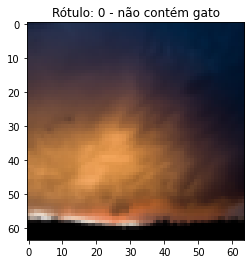

In [9]:
#visualizando a primeira imagem
plt.imshow(x_train[0]);
plt.title('Rótulo: {} - não contém gato'.format(y_train[0]));

Eu não sei muito bem o que é a **primeira** imagem, mas certamente não é a de um **gato**. Nosso **objetivo** é conseguir ensinar a máquina a **classificar** gatos, então vamos procurar outro registro do dataset.

O **terceiro** registro é a de um gato, encontramos. Mas você notou que ao **plotar** a imagem com [plt.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) aparece algo semelhante a uma **escala** do lado? E que ela vai até 60 e poucos?

E nossa imagem tem 60 e poucos pixels...

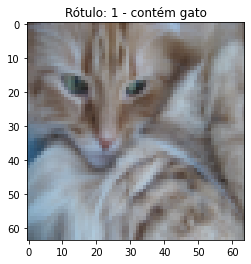

In [10]:
#exibindo a imagem de um gato da base de treino
plt.imshow(x_train[2])
plt.title('Rótulo: {} - contém gato'.format(y_train[2]));

#Ajustando os Dados

Por conveniência e performance computacional, se costuma tratar **cada** imagem como um **vetor**-coluna e mudar o formato para um **array** da numpy. Como nossas imagens tem 64x64 pixels e **três** canais de cor, este vetor teria cerca de `64x64x3 = 12288` **elementos**. Ao criarmos uma matriz que conntivesse cada uma destas imagens, teriamos uma matriz com 12288 **linhas** e `m` **colunas**. Onde m pode ser *209* se for os dados de **treino** ou *50* se for os dados de **teste**.

 <center><img src="https://cdn-images-1.medium.com/max/800/1*V8OxIKYrVuuPUhkD5LTMXA.png" width="50%"></center>

In [11]:
#transformando em um array da numpy
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

O código abaixo **transforma** os dados na matriz **comentada** acima. É importante ressaltar que os dados de cada imagem vão sendo **empilhados**. Primeiro são **colocados** os 64x64 elementos do canal vermelho, depois do verde e por fim os do canal azul.

In [12]:
#quantidade de dados de treino e teste
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

#fazendo o reshape dos x de treino e teste
x_train_reshaped = x_train.reshape(number_of_train,-1).T
x_test_reshaped = x_test.reshape(number_of_test,-1).T

#fazendo o reshape dos y de treino e teste
y_train_reshaped = y_train.reshape(number_of_train,-1).T
y_test_reshaped = y_test.reshape(number_of_test,-1).T

In [13]:
#avaliando a quantidade de valores para treino
print('Variavéis independentes de treino:', x_train_reshaped.shape)
print('Variavéis dependentes de treino:', y_train_reshaped.shape)

Variavéis independentes de treino: (12288, 209)
Variavéis dependentes de treino: (1, 209)


In [14]:
#avaliando a quantidade de valores para teste
print('Variavéis independentes de teste:', x_test_reshaped.shape)
print('Variavéis dependentes de teste:', y_test_reshaped.shape)

Variavéis independentes de teste: (12288, 50)
Variavéis dependentes de teste: (1, 50)


Lá em cima, falamos que iriamos comentar da variável **dependente** `Y`.
Chegou a hora!

A variável `y` traz o **rótulo** de cada imagem. O valor `1` significa que a imagem representa um gato, já o **zero** traz a **negativa**. Ou seja, a imagem **não** representa um gato.

Ao exibir o `y` de treino (o de teste é o **mesmo** raciocínio) percebemos que o **primeiro** elemento **não** é a de um gato, já que está assinalada como **zero**. Já o **terceiro** elemento está com o valor `1`, portanto é a de um **gato**.

Você deve ter observado que também demos uma [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) nesta variável. Fizemos isso porque o numpy não **performa** muito bem quando ela está do tipo (209,).

In [15]:
y_train_reshaped

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

Lembra que cada **quadradinho** de pixel pode estar indo de 0 até 255? Um processo comum em *machine learning* é reduzir o **intervalo** entre valores de nossa variável, ou seja, tentar diminuir este *255 - 0* que pode causar algum tipo de enviesamento para valores maiores. 

Uma maneira simples de realizar este **procedimento** é dividir os valores pelo valor **máximo** de intensidade do array, ou seja, 255.


In [16]:
#standartizando os valores de x
x_train_reshaped = x_train_reshaped / 255
x_test_reshaped = x_test_reshaped / 255

#Implementação da combinação linear e função de ativação

Pronto, agora temos nossas imagens **vetorizadas**. Precisamos fazer com que elas, nossos `x` (**inputs**), "*entrem*" em uma função linear e posteriormente "*passem*" por uma função de **ativação** que retorne a probabilidade de ela pertencer a classe dos gatos.

A figura embaixo **ilustra** este processo de forma **simplificada**. É importante ressaltar que **neste caso** exemplificado não são 12288 elementos que estão determinando uma imagem, mas **apenas** 3.

<center><img src="https://miro.medium.com/max/1200/1*sPg-0hha7o3iNPjY4n-vow.jpeg" width="60%"></center>

Neste momento, precisamos retornar a ideia **inicial** do neurônio proposto por [McCulloch e Pitts](https://jontalle.web.engr.illinois.edu/uploads/498-NS.19/McCulloch-Pitts-1943-neural-networks.pdf). Em nosso caso, a combinação linear (`z`) é uma **regressão** simples. Onde os valores de `w` e `b` são variáveis que foram **atribuídas** com o valor zero.

<center><img src="https://miro.medium.com/max/700/1*wldytf7qpc3svHc0hLMiJQ@2x.png" width="30%"></center>

**Obs: os valores dos vetores w e b serão otimizados posteriormente.**

É importante notar que `w`, ou sua [transposta](https://www.todamateria.com.br/matriz-transposta/), deve ser um **vetor** de tamanho *1 X 12288*. Isso ocorre porque uma das **propriedades** da  [multiplicação de vetores - ou matrizes](https://www.infoescola.com/matematica/operacoes-com-matrizes-multiplicacao/), obriga o número de **colunas** de uma matriz ter **igual** valor ao número de **linhas** da outra matriz.

<center><img src="https://cdn-images-1.medium.com/max/800/1*DwTuChaiToN9qnhPi4cDVg.png" width="70%"></center>

Após realizada a **multiplicação** entre `w` e `x`, obteremos um vetor *1 x 209*. Basta somar o b, que deve ter a **mesma dimensão** desta última *multiplicação* feita, e temos os valores de nossa combinação linear `z` - um vetor de dimensão *1 x 209*. Volte um pouquinho no texto e **compare** com a dimensão do `y_train_reshaped`!

**Obs: o 209 é considerando os dados de treino, caso fosse os de teste seria 50.**

In [17]:
#função para inicializar os valores de w e b como zeros
def inicializar(x):
  w = np.zeros((x.shape[0],1))
  b = 0.0
  return w,b

In [18]:
#inicializando os weights e o bias com zero
w,b = inicializar(x_train_reshaped)
print('Dimensões de w:',w.shape)
print('Valor de b:',b)

Dimensões de w: (12288, 1)
Valor de b: 0.0


Ok, temos uma combinação **linear** e setamos os valores iniciais de `w` e `b` como **zero**. Tudo feito para a parte **linear**!

Agora precisamos de uma **função** que coloque nossos valores em um intervalo entre `0` e `1`, isso é conhecido como [função de ativação](https://www.deeplearningbook.com.br/funcao-de-ativacao/#:~:text=A%20fun%C3%A7%C3%A3o%20de%20ativa%C3%A7%C3%A3o%20%C3%A9%20a%20transforma%C3%A7%C3%A3o%20n%C3%A3o%20linear%20que,simplesmente%20fazem%20uma%20transforma%C3%A7%C3%A3o%20linear.). Estes valores representariam a **probabilidade** da imagem representar ou não um **gato**. Em resumo, nós estamos tentando **simular** a atividade *all-or-none* dos neurônios. Neste caso específico 1 , ou próximo disso, para **gatos** e 0 para não-gatos.

A função de **ativação** que utilizaremos está **ilustrada** abaixo. Ela é conhecida como [sigmóide](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_sigmoide). Observe que seu eixo **vertical** vai de zero até 1. 

<center><img src="https://ai-master.gitbooks.io/logistic-regression/content/assets/sigmoid_function.png"></center>


Com a função de ativação **definida**, podemos **inputar** nossos valores de `z` já estabelecidos. Isso, em termos **matemáticos** significa:

<center><img src="https://miro.medium.com/max/700/1*NamKraiU7OQaDzkY1FSX3w@2x.png" width="50%"></center>

In [19]:
#função de ativação sigmoidal
def sigmoidal(z):
  return 1.0/(1.0+np.exp(-z))

**Sintetizando** tudo o que foi feito até agora:

* **empilhamos** os valores de cada imagem em um **coluna** da matriz `x`. Cada imagem está em uma coluna.
* essa matriz `x` passará por uma transformação **linear**.
* o **resultado** desta transformação será **inputada** em uma função de **ativação** e **retornará** um valor entre zero e 1.
* o valor (y) retornado é considerado a **probabilidade** de nossa imagem ser ou não um gato.


<center><img src="https://cdn-images-1.medium.com/max/800/1*NqQz69UgV083Id6Ex7pcvA.png"></center>



## Forward Propagation - Left to Right ⏩

Agora é a hora de **simular** o *aprendizado* da forma mais simples possível.

Suponha que nosso neurônio aviste uma **imagem** aleatória. Da mesma forma que ocorre em um **impulso** elétrico, os elementos da imagem se **propagam** da *esquerda para direita* em nossa rede. Estes valores de entrada se combinam **linearmente** e passam por uma função de **ativação** que dirá se temos ou não um gato.

<center><img src="https://lh5.googleusercontent.com/0h2x6KBGVF6sEkHA12kq-lrCGH9iX0_LEtphjCbb0A-WUQDqQwmjU0HvSzb3s_k-pe7tkAL1zC0MqfROHiCLnbogb5R2OVaD9FUX8tFEkYis8K8NlBq1SoBND3wM0oOCNQWFrtI" width="50%"></center>

In [20]:
#funcao da propagação da esquerda para a direita
def forward_propagation(w,b,x):
  z = np.dot(w.T,x) + b
  a = sigmoidal(z)
  return a

Lembra que setamos os valores do vetores w e b como **zeros**? No código abaixo vemos o resultado desta propagação direta **unidirecional** utilizando estes valores **considerados**.

In [21]:
#primeiros valores retornados após a aplicação na equação logística
a =  forward_propagation(w,b,x_train_reshaped)
print('Dimensões da matriz após passar pela função de ativação:',a.shape,'\n')
a

Dimensões da matriz após passar pela função de ativação: (1, 209) 



array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

##Backward Propagation - Right to Left ⏪  ***TERMINAR***

A **probabilidade** de todas as imagens serem gatos **resultou** em `0.5`. Se aplicássemos este algoritmo em imagens **desconhecidas** os resultados seriam os **mesmos**.

Isso aconteceu porque nossas variáveis `w` e `b` tem os seus elementos valendo **zero**. Mas quais seriam os **melhores** valores para `w` e `b`? Eu também não sei! 😭

Mas é **justamente** isto que o neurônio tem que **aprender**. *Sozinho*...

Uma **técnica** para realizar esta tarefa foi popularizada por [Geoffrey Hinton](https://medium.com/syncedreview/who-invented-backpropagation-hinton-says-he-didnt-but-his-work-made-it-popular-e0854504d6d1), ela é chamada de **Backpropagation**.  Basicamente, serão utilizados os **erros** de nosso algoritmo para melhorá-lo.

Para **calcular** o erro de **todas** as imagens, usaremos uma [Função de Perda](https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220). Sua fórmula
 matemática é a seguinte:

<center><img src="https://editor.analyticsvidhya.com/uploads/90149Capture0.PNG"></center>

**Obs: p(yi) é nosso estimador. Ou seja, os valores resultantes de nossa função de ativação.**

Ok, neste momento estou ciente que dei uma **cartada**. Mas esta é a *cost function* utilizada para a regressão **logística**. **Utilizamos essa função pq**....


Vamos **voltar** a nossa rede neural e o backpropagation. Nós queremos valores para as variáveis `w` e `b` que **minimizem** a nossa função de **perda**. *Minimizar* e *função*, duas palavras que os **matemáticos** são apaixonados!

Na verdade, esta ideia de *maximizar/minimizar* **funções** também pode ser entendida como uma [otimização](https://pt.wikipedia.org/wiki/Otimiza%C3%A7%C3%A3o). Se você entende um pouco de **cálculo** sabe que para encontrar o ponto **mínimo** da perda em função das variáveis `w` e `b`, é necessário realizar as **derivadas** destas funções em **razão** destas variáveis. Mais especificamente, a derivada **parcial** de cada variável **considerando** a função de perda.

<center><img src="https://i.ytimg.com/vi/mbjHQzkLWFE/hqdefault.jpg"></center>

Vamos lá, no fundo queremos saber como as variáveis de **entrada** variam em função da **perda**, isso quer dizer:

<center>
 $\frac{\partial L}{\partial w}$ e $\frac{\partial L}{\partial b}$</center>

Pela [regra da cadeia](https://www.somatematica.com.br/superior/derivada2.php), temos que:

 $\frac{\partial L}{\partial w} = \frac{\partial L}{\partial z}\frac{\partial z}{\partial w}$ e $\frac{\partial L}{\partial b} = \frac{\partial L}{\partial z}\frac{\partial z}{\partial b}$

  * onde pode ser visto facilmente que : $\frac{\partial z}{\partial b} = 1$

Expandindo os últimos termos, obtemos:

 $\frac{\partial L}{\partial w} = \frac{\partial L}{\partial a}\frac{\partial a}{\partial z}\frac{\partial z}{\partial w}$ e $\frac{\partial L}{\partial b} = \frac{\partial L}{\partial a}\frac{\partial a}{\partial z}$

Não precisamos reinventar a roda, [a sigmóide já foi derivada](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e)



$\frac{\partial a}{\partial z}=\vec{a}(1-\vec{a})$


In [ ]:
#funcao propagacao da direita para a esquerda, "aprender com os erros"
def backward_propagation(a,x,y):
  m = x.shape[1]
  dz = a - y
  dw = (np.dot(x,dz.T))*(1/m)
  db = np.sum(dz) * (1/m)
  return dw,db

In [ ]:
#realizando a propagação left to right
dw,db  = backward_propagation(a,x_train_reshaped,y_train_reshaped)

#imprimindo as dimensões das matrizes
print('Dimensão do dw:',dw.shape)
print('Valor do db:',db)

Dimensão do dw: (12288, 1)
Valor do db: 0.15550239234449761


## Gradiente Descendente
texto texto

<center><img src="https://cdn.builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/gradient-descent-convex-function.png" width="30%"></center>

texto texto texto
<center><img src="https://i.stack.imgur.com/khaJb.png" width="40%"></center>
texto texto
<center><img src="https://editor.analyticsvidhya.com/uploads/36152Screenshot%20(43).png" width="30%"></center>



In [ ]:
#função do gradiente descendente
def gradient_descent(w,b,dw,db,alpha):
  w = w - (alpha*dw)
  b = b - (alpha*db)
  return w,b

In [ ]:
#aplicando o gradiente uma vez
w,b = gradient_descent(w,b,dw,db,alpha=0.05)

In [ ]:
#visualizando o w após o primeiro gradiente
w

array([[-0.00236045],
       [-0.00314992],
       [-0.00246177],
       ...,
       [-0.00253729],
       [-0.0031063 ],
       [-0.00162257]])

In [ ]:
#visualizando o b após o primeiro gradiente
b

-0.007775119617224881

falar de fazer um left to right novamente

In [ ]:
#refazendo o forward propagation
forward_propagation(w,b,x_train_reshaped)

array([[5.15371275e-05, 1.00416208e-07, 6.90105825e-09, 8.25975462e-05,
        6.04630389e-05, 1.71890542e-04, 6.51982405e-05, 1.16083030e-05,
        7.18799375e-07, 4.42643816e-06, 4.49956267e-09, 1.60608657e-07,
        6.27427570e-06, 1.50607025e-09, 1.70478589e-08, 5.44878887e-10,
        2.87244853e-09, 4.88935925e-11, 2.65235007e-08, 3.35837800e-04,
        6.68138075e-08, 3.24431632e-05, 3.07121378e-11, 2.99957257e-10,
        9.31860166e-09, 2.58536275e-03, 4.48606345e-07, 1.49141113e-07,
        1.11353417e-05, 9.91140095e-07, 3.74077895e-04, 1.53116595e-08,
        1.59178634e-07, 2.71314074e-08, 6.99315574e-06, 2.08427941e-05,
        1.06107986e-06, 1.32201485e-10, 3.96881496e-02, 1.24198476e-06,
        6.55995680e-07, 1.56335474e-03, 6.97270310e-08, 9.62351237e-09,
        2.43048643e-07, 8.95776645e-05, 1.42805478e-07, 6.06406423e-06,
        9.05486884e-06, 1.05593356e-06, 2.91461324e-10, 6.97966480e-08,
        3.60577187e-08, 2.94594843e-10, 9.13046307e-06, 6.479656

funcao para decidir

In [ ]:
#funcao para realizar a decisao
def decision(a):
  for i in range(a.shape[1]):
    if a[0][i] >= 0.5:
      a[0][i] = 1
    else:
      a[0][i] = 0
  return a

## Realizando iterações do Gradiente Descendente

texto texto texto

In [ ]:
#iterações do gradiente descendente
iteracoes = 10000
lista_de_acertos , lista_de_iteracoes = [] , []
for i in range(iteracoes):
  a = forward_propagation(w,b,x_train_reshaped)
  dw,db = backward_propagation(a,x_train_reshaped,y_train_reshaped)
  w,b = gradient_descent(w,b,dw,db,alpha=0.001)
  previsoes = decision(a)
  if (i % 500) == 0:
    acertos = (previsoes == y_train_reshaped).sum() / previsoes.shape[1]
    print('Iteração:',i,'- Acerto:',acertos)
    lista_de_iteracoes.append(i)
    lista_de_acertos.append(acertos)

Iteração: 0 / Acerto: 0.6555023923444976
Iteração: 500 / Acerto: 0.7799043062200957
Iteração: 1000 / Acerto: 0.8660287081339713
Iteração: 1500 / Acerto: 0.8947368421052632
Iteração: 2000 / Acerto: 0.9138755980861244
Iteração: 2500 / Acerto: 0.9234449760765551
Iteração: 3000 / Acerto: 0.937799043062201
Iteração: 3500 / Acerto: 0.9521531100478469
Iteração: 4000 / Acerto: 0.9569377990430622
Iteração: 4500 / Acerto: 0.9617224880382775
Iteração: 5000 / Acerto: 0.9712918660287081
Iteração: 5500 / Acerto: 0.9712918660287081
Iteração: 6000 / Acerto: 0.9712918660287081
Iteração: 6500 / Acerto: 0.9760765550239234
Iteração: 7000 / Acerto: 0.9760765550239234
Iteração: 7500 / Acerto: 0.9760765550239234
Iteração: 8000 / Acerto: 0.9856459330143541
Iteração: 8500 / Acerto: 0.9856459330143541
Iteração: 9000 / Acerto: 0.9856459330143541
Iteração: 9500 / Acerto: 0.9856459330143541


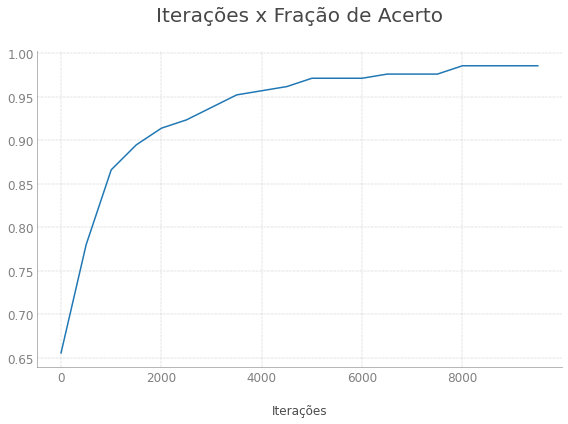

In [ ]:
#criando o ax e o figure no matplotlib
fig,ax = plt.subplots(figsize=(8,6))

#criando o gráfico
ax.plot(lista_de_iteracoes,lista_de_acertos)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(0.7)
ax.spines['bottom'].set_color('grey')
ax.spines['bottom'].set_alpha(0.7)
ax.grid(linestyle='-.',lw=0.35,aa=True)
ax.tick_params(axis='both',colors='grey',length=0,labelsize=12)
ax.set_xlabel('Iterações',labelpad=20,fontdict={'fontsize':12},color='#4c4c4c')
ax.set_title('Iterações x Fração de Acerto',pad=30,fontdict={'fontsize':20},color='#474747')

#plotando o gráfico
plt.tight_layout();

# Utilizando para dados não treinados

texto texto texto

In [ ]:
#passando os dados desconhecidos
previsoes = decision(forward_propagation(w,b,x_test_reshaped))

#comparando as previsoes
porcentagem_de_acertos = (previsoes == y_test_reshaped).sum() / previsoes.shape[1]

print('Acuracidade da rede neural:',porcentagem_de_acertos)

Acuracidade da rede neural: 0.7


#Criando um modelo completo

<center><img src="https://miro.medium.com/max/700/1*eWWRkK3zYLKBSr4C-iIvXA@2x.png" width="60%"></center>

texto texto texto

In [ ]:
class NeuralNetwork:
  """ Agrupando todos os conceitos juntos """

  def __init__(self):
    pass

  def inicializar_with_zeros(x_train):
    w = np.zeros((x_train.shape[0],1))
    b= 0.0
    return w,b

  def sigmoidal_func(z):
    return 1.0/(1.0 + np.exp(-z))
  
  def ForwardPropagation(w,b,x_train):
    z = np.dot(w.T,x_train) + b
    a = NeuralNetwork.sigmoidal_func(z)
    return a

  def BackwardPropagation(a,x_train,y_train):
    m = x_train.shape[1]
    dz = a - y_train
    dw = (np.dot(x_train,dz.T)) * (1/m)
    db = np.sum(dz) * (1/m)
    return dw, db

  def GradientDescent(w,b,dw,db,learning_rate=0.05):
    w = w - (learning_rate * dw)
    b = b - (learning_rate * db)
    return w,b
  
  def decision(a,threshold=0.5):
    for i in range(a.shape[1]):
      if a[0][i] >= threshold:
        a[0][i] = 1
      else:
        a[0][i] = 0
    return a

  def print_iterations_accuracy(acertos,iter):
     print('Iteração',iter,'- Acurácia:',acertos)
  
  def calcular_acertos(previsoes,y_train):
    acertos = (previsoes == y_train).sum() / previsoes.shape[1]
    return acertos

  def applying_neural_network(x_train,y_train,threshold=0.5,learning_rate = 0.05,
                              iteracoes = 5000,imprimir=True):
    lista_de_acertos,lista_de_iteracoes = [],[]
    w,b = NeuralNetwork.inicializar_with_zeros(x_train)
    for iter in range(iteracoes+1):
      a = NeuralNetwork.ForwardPropagation(w,b,x_train)
      dw,db = NeuralNetwork.BackwardPropagation(a,x_train,y_train)
      w,b = NeuralNetwork.GradientDescent(w,b,dw,db,learning_rate)

      if (iter % (iteracoes/10)) == 0:
        previsoes = NeuralNetwork.decision(a,threshold)
        acertos = NeuralNetwork.calcular_acertos(previsoes,y_train)
        lista_de_acertos.append(acertos)
        lista_de_iteracoes.append(iter)
        if imprimir:
          NeuralNetwork.print_iterations_accuracy(acertos,iter)
    return lista_de_iteracoes,lista_de_acertos,w,b
  
  def predict(x_test,w,b):
    Forward_predict = NeuralNetwork.ForwardPropagation(w,b,x_test)
    return NeuralNetwork.decision(Forward_predict)

  def accuracy_test(predicoes,y_test):
     return (predicoes == y_test).sum() / predicoes.shape[1]

realizando as previsoes com esta funcao criada

In [ ]:
lista_de_iteracoes, lista_de_acertos,w,b = NeuralNetwork.applying_neural_network(x_train_reshaped,y_train_reshaped,learning_rate=0.001,iteracoes=5000)

Iteração 0 - Acurácia: 0.3444976076555024
Iteração 500 - Acurácia: 0.7751196172248804
Iteração 1000 - Acurácia: 0.8660287081339713
Iteração 1500 - Acurácia: 0.8899521531100478
Iteração 2000 - Acurácia: 0.9138755980861244
Iteração 2500 - Acurácia: 0.9234449760765551
Iteração 3000 - Acurácia: 0.937799043062201
Iteração 3500 - Acurácia: 0.9521531100478469
Iteração 4000 - Acurácia: 0.9569377990430622
Iteração 4500 - Acurácia: 0.9617224880382775
Iteração 5000 - Acurácia: 0.9665071770334929


In [ ]:
predicoes = NeuralNetwork.predict(x_test_reshaped,w,b)

In [ ]:
(predicoes == y_test).sum() / predicoes.shape[1]

0.74

#Testando com diferentes parâmetros

texto texto
 learning rate

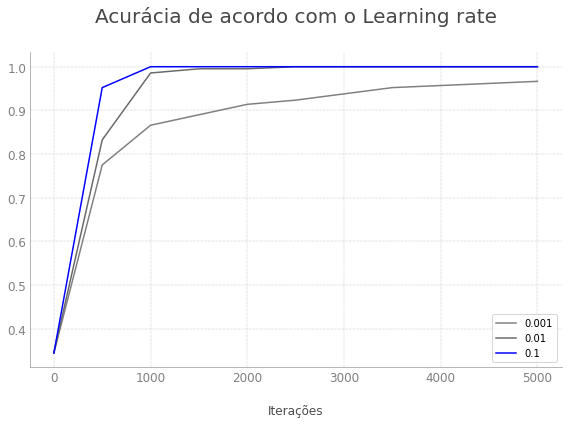

In [ ]:
#learning rates a serem testados
learning_rates = [0.001,0.01,0.1]

#listas para guardar os valores das acuracidades e iteracoes
acuracidade = []
iteracoes = []

for learning_rate in learning_rates:
   lista_de_iteracoes, lista_de_acertos, _ , _ = NeuralNetwork.applying_neural_network(x_train_reshaped,y_train_reshaped,
                                                                                       learning_rate=learning_rate,iteracoes=5000,imprimir=False)
   iteracoes.append(lista_de_iteracoes)
   acuracidade.append(lista_de_acertos)

#criar gráficos
fig,ax = plt.subplots(figsize=(8,6))

#criando os gráficos
ax.plot(iteracoes[0],acuracidade[0],color='grey')
ax.plot(iteracoes[1],acuracidade[1],color='dimgrey')
ax.plot(iteracoes[2],acuracidade[2],color='blue')

#colocando legendas
lengendas = ['0.001','0.01','0.1']
ax.legend(lengendas,framealpha=0.8)

#layout do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(0.7)
ax.spines['bottom'].set_color('grey')
ax.spines['bottom'].set_alpha(0.7)
ax.grid(linestyle='-.',lw=0.35,aa=True)
ax.tick_params(axis='both',colors='grey',length=0,labelsize=12)
ax.set_xlabel('Iterações',labelpad=20,fontdict={'fontsize':12},color='#4c4c4c')
ax.set_title('Acurácia de acordo com o Learning rate',pad=30,fontdict={'fontsize':20},color='#474747')

#plotando os gráficos
plt.tight_layout();

#Considerações Finais


texto texto texto